<a href="https://colab.research.google.com/github/elietshibz/ElijahT_INFO4760_SPRING2026/blob/main/Assignment_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [25]:
# Write your code here

from google.colab import files
uploaded = files.upload()


Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Shape: (18254, 14)

Columns: ['Column 1', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Dtypes:
 Column 1          int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Summary stats:
             Column 1      Date  AveragePrice  Total Volume          4046  \
count   18254.000000     18254  18254.000000  1.825300e+04  1.825200e+04   
unique           NaN       170           NaN           NaN           NaN   
top              NaN  2-4-2018           NaN           NaN           NaN   
freq             NaN       109           NaN           NaN           NaN   
mean       24.228060       NaN      1.406073  8.504609

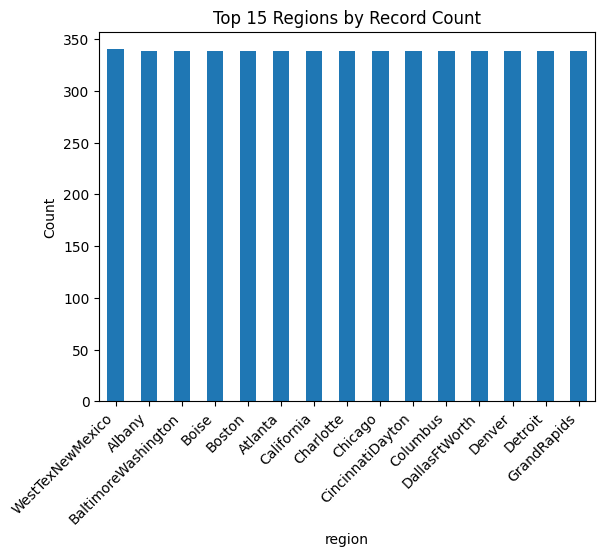

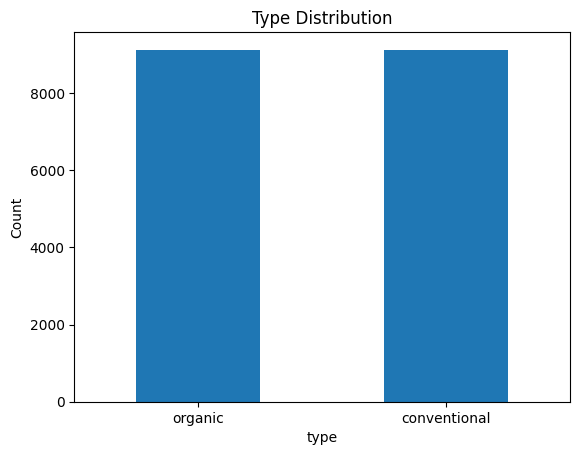

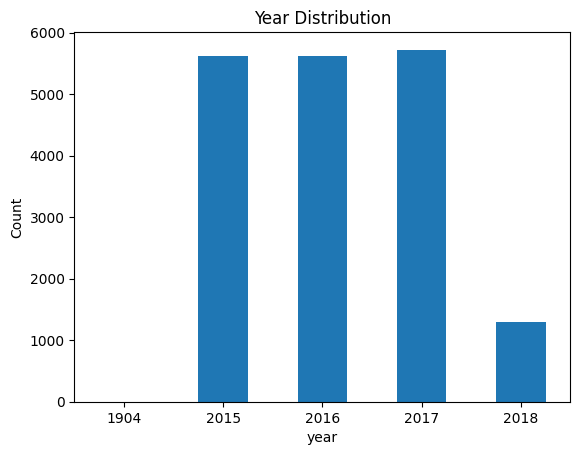

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Assignment 2 dataset.csv")

# Quick inspection
display(df.head())
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nSummary stats:\n", df.describe(include="all"))

# --- Distribution checks (bias) ---
# Region distribution (top 15)
region_counts = df["region"].value_counts()
plt.figure()
region_counts.head(15).plot(kind="bar")
plt.title("Top 15 Regions by Record Count")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

# Type distribution
type_counts = df["type"].value_counts()
plt.figure()
type_counts.plot(kind="bar")
plt.title("Type Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Year distribution
year_counts = df["year"].value_counts().sort_index()
plt.figure()
year_counts.plot(kind="bar")
plt.title("Year Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Interpretation (write your thoughts here in comments)
# Example: If one region/year dominates the dataset heavily, the model may learn patterns
# biased toward that region/year and perform worse elsewhere.





1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [15]:
# Duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Missing values per column
missing_per_col = df.isna().sum()
print("\nMissing values per column:\n", missing_per_col)

# How to handle (write in comments):
# - Duplicates: usually drop_duplicates()
# - Missing: either drop rows with many missing, or impute (median/mode), ideally grouped by region


Duplicate rows: 2

Missing values per column:
 Column 1        0
Date            0
AveragePrice    0
Total Volume    1
4046            2
4225            1
4770            1
Total Bags      1
Small Bags      2
Large Bags      2
XLarge Bags     1
type            1
year            0
region          0
dtype: int64


1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [16]:
print("Rows, Columns:", df.shape)

# Brief comment (add your own):
# With ~18k rows and ~13 useful features, this is typically enough to train baseline ML models,
# assuming the target is well-defined and the data is representative.


Rows, Columns: (18254, 14)


#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [17]:
# Remove first column / "Column 1"
if "Column 1" in df.columns:
    df = df.drop(columns=["Column 1"])
else:
    df = df.iloc[:, 1:]  # fallback: drop the first column

# Treat year as nominal (categorical)
df["year"] = df["year"].astype(str).astype("category")

print(df.columns)
print(df.dtypes[["year"]])


Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')
year    category
dtype: object


2.2 Check for duplicate values and remove them.

In [18]:
before = len(df)
df = df.drop_duplicates()
after = len(df)

print("Removed duplicates:", before - after)
print("New shape:", df.shape)


Removed duplicates: 2
New shape: (18252, 13)


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [19]:
import numpy as np

# Check missing
row_missing = df.isna().sum(axis=1)
total_cols = df.shape[1]

# Define "most missing" as > 50% missing (reasonable rule)
threshold = int(np.ceil(total_cols * 0.5))

# Drop rows with "most" missing
before = len(df)
df = df[row_missing <= threshold].copy()
after = len(df)
print("Dropped rows with >50% missing:", before - after)

# Impute remaining missing values:
# - numeric: median within each region
# - categorical: mode within each region (fallback to overall mode)
numeric_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns

# Numeric median by region
for col in numeric_cols:
    df[col] = df.groupby("region")[col].transform(lambda s: s.fillna(s.median()))

# Categorical mode by region
for col in cat_cols:
    def fill_mode(s):
        m = s.mode()
        return s.fillna(m.iloc[0] if len(m) else s.dropna().iloc[0] if s.dropna().size else None)
    df[col] = df.groupby("region")[col].transform(fill_mode)

print("Missing values after cleaning:\n", df.isna().sum())


Dropped rows with >50% missing: 1
Missing values after cleaning:
 Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


              AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192767 -0.208325 -0.172944 -0.179458   
Total Volume     -0.192767      1.000000  0.977863  0.974181  0.872203   
4046             -0.208325      0.977863  1.000000  0.926110  0.833390   
4225             -0.172944      0.974181  0.926110  1.000000  0.887856   
4770             -0.179458      0.872203  0.833390  0.887856  1.000000   
Total Bags       -0.177103      0.963047  0.920057  0.905788  0.792315   
Small Bags       -0.174742      0.967238  0.925280  0.916032  0.802734   
Large Bags       -0.172953      0.880640  0.838646  0.810016  0.698473   
XLarge Bags      -0.117604      0.747158  0.699378  0.688810  0.679862   

              Total Bags  Small Bags  Large Bags  XLarge Bags  
AveragePrice   -0.177103   -0.174742   -0.172953    -0.117604  
Total Volume    0.963047    0.967238    0.880640     0.747158  
4046            0.920057    0.925280    0.838646     0.699378  
422

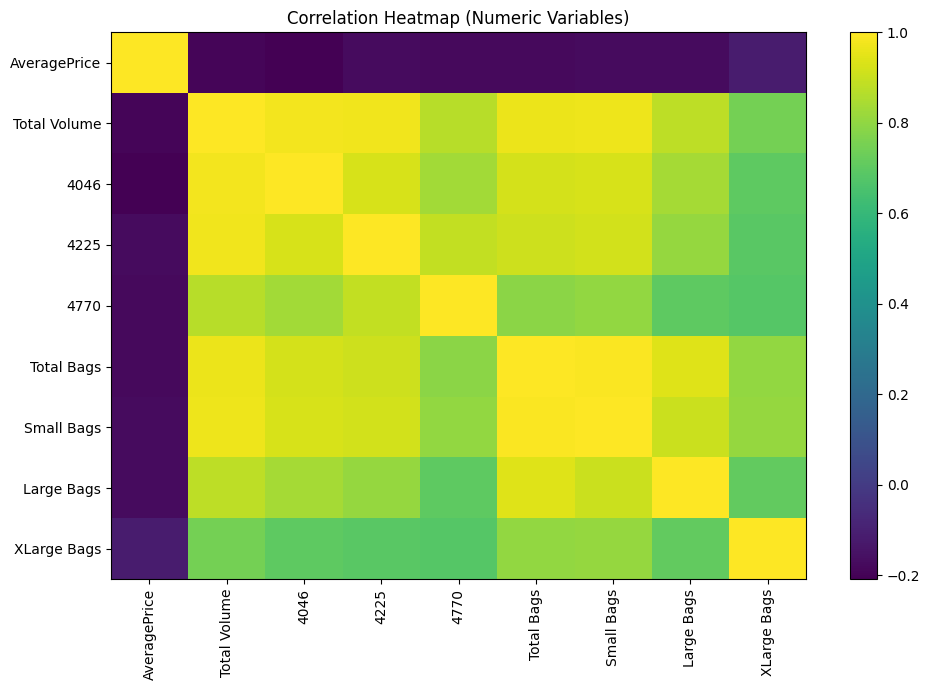


Strong correlations (|r| >= 0.7):
 Total Bags    Small Bags     0.994334
Total Volume  4046           0.977863
              4225           0.974181
              Small Bags     0.967238
              Total Bags     0.963047
Total Bags    Large Bags     0.943009
4046          4225           0.926110
              Small Bags     0.925280
              Total Bags     0.920057
4225          Small Bags     0.916032
              Total Bags     0.905788
Small Bags    Large Bags     0.902589
4225          4770           0.887856
Total Volume  Large Bags     0.880640
              4770           0.872203
4046          Large Bags     0.838646
              4770           0.833390
4225          Large Bags     0.810016
Small Bags    XLarge Bags    0.806845
Total Bags    XLarge Bags    0.804233
4770          Small Bags     0.802734
              Total Bags     0.792315
Total Volume  XLarge Bags    0.747158
Large Bags    XLarge Bags    0.710860
dtype: float64


In [20]:
import matplotlib.pyplot as plt

# Correlation on numeric features only
num_df = df.select_dtypes(include="number")
corr = num_df.corr()

print(corr)

# Heatmap (matplotlib)
plt.figure(figsize=(10, 7))
plt.imshow(corr, aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Variables)")
plt.tight_layout()
plt.show()

# List strong correlations
strong = (corr.abs()
          .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
          .stack()
          .sort_values(ascending=False))
print("\nStrong correlations (|r| >= 0.7):\n", strong[strong >= 0.7])

# Comment (add in markdown or comments):
# Highly correlated features can cause redundancy and multicollinearity, which can
# hurt interpretability and sometimes model stability; they can also inflate importance.


#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

Columns: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']

Dtypes:
 Date              object
AveragePrice     float64
Total Volume     float64
4046             float64
4225             float64
4770             float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type              object
year            category
region            object
dtype: object

--- AveragePrice (numeric) ---
min: 0.44
max: 3.25
mean: 1.406020492027834
median: 1.37


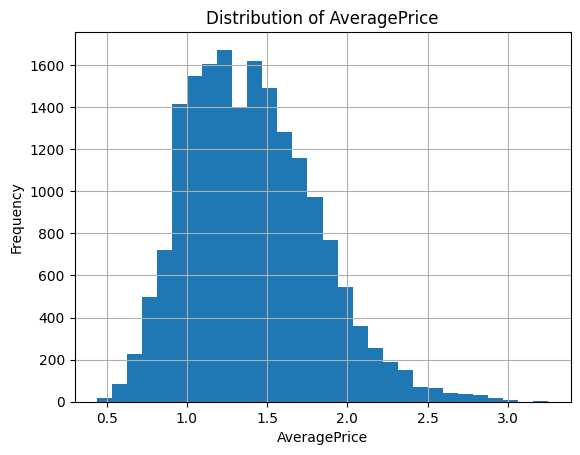


--- Total Volume (numeric) ---
min: 84.56
max: 62505646.52
mean: 850552.3121034465
median: 107354.25


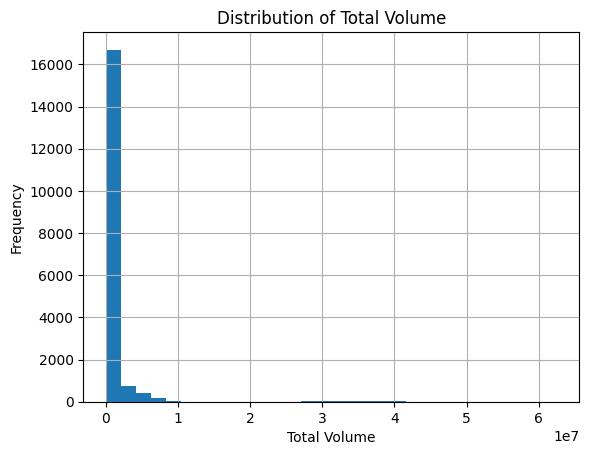


--- 4046 (numeric) ---
min: 0.0
max: 22743616.17
mean: 292983.9537370555
median: 8645.3


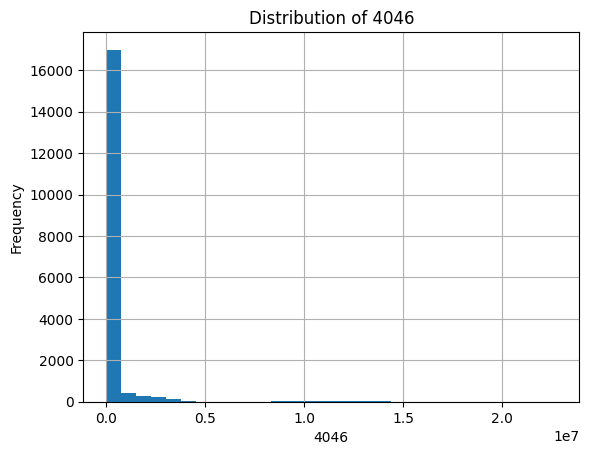


--- 4225 (numeric) ---
min: 0.0
max: 20470572.61
mean: 295122.54683140654
median: 29056.73


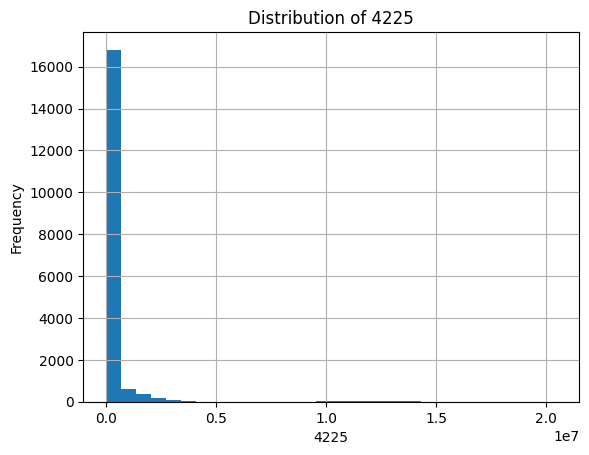


--- 4770 (numeric) ---
min: 0.0
max: 2546439.11
mean: 22837.27302997096
median: 184.99


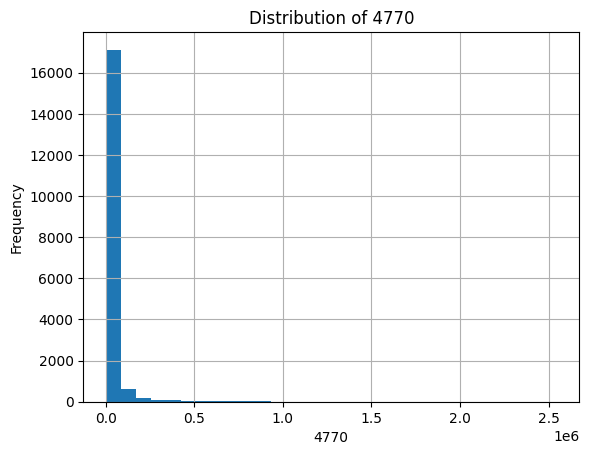


--- Total Bags (numeric) ---
min: 0.0
max: 19373134.37
mean: 239613.96402060156
median: 39738.53


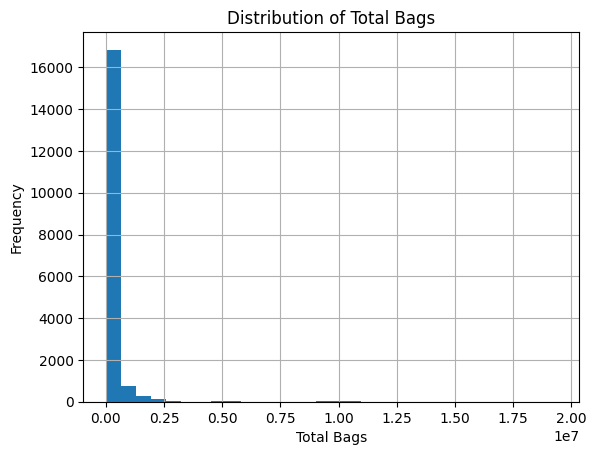


--- Small Bags (numeric) ---
min: 0.0
max: 13384586.8
mean: 182178.41816119666
median: 26362.82


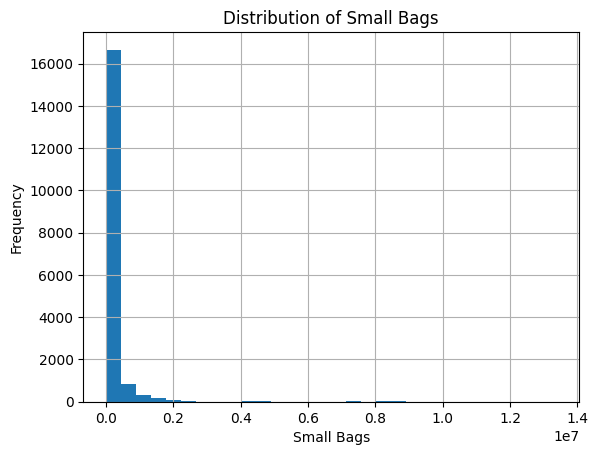


--- Large Bags (numeric) ---
min: 0.0
max: 5719096.61
mean: 54332.33196537176
median: 2647.71


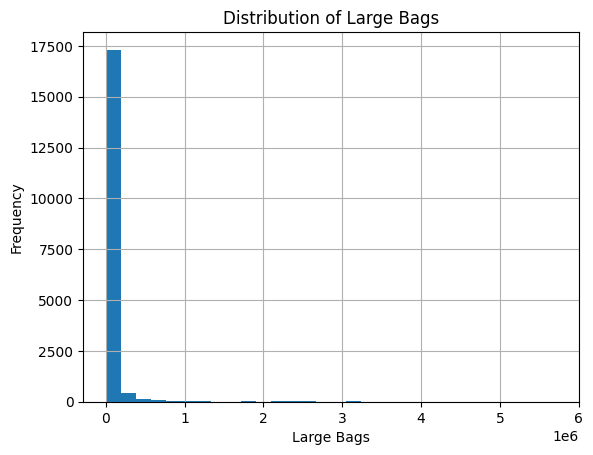


--- XLarge Bags (numeric) ---
min: 0.0
max: 551693.65
mean: 3106.086095556407
median: 0.0


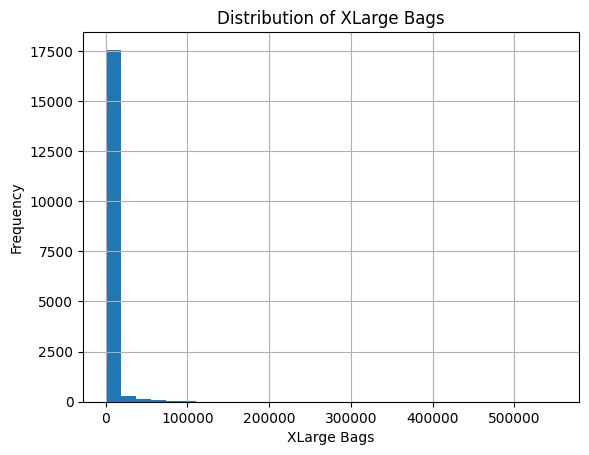


--- Date (categorical) ---
Unique values: ['12-27-2015' '12-20-2015' '12-13-2015' '12-6-2015' '11-29-2015'
 '11-22-2015' '11-15-2015' '11-8-2015' '11-1-2015' '10-25-2015'
 '10-18-2015' '10-11-2015' '10-4-2015' '9-27-2015' '9-20-2015' '9-13-2015'
 '9-6-2015' '8-30-2015' '8-23-2015' '8-16-2015' '8-9-2015' '8-2-2015'
 '7-26-2015' '7-19-2015' '7-12-2015' '7-5-2015' '6-28-2015' '6-21-2015'
 '6-14-2015' '6-7-2015' '5-31-2015' '5-24-2015' '5-17-2015' '5-10-2015'
 '5-3-2015' '4-26-2015' '4-19-2015' '4-12-2015' '4-5-2015' '3-29-2015'
 '3-22-2015' '3-15-2015' '3-8-2015' '3-1-2015' '2-22-2015' '2-15-2015'
 '2-8-2015' '2-1-2015' '1-25-2015' '1-18-2015']
Unique count: 170

--- type (categorical) ---
Unique values: ['conventional' 'organic']
Unique count: 2

--- year (categorical) ---
Unique values: ['2015', '2016', '2017', '2018', '1904']
Categories (5, object): ['1904', '2015', '2016', '2017', '2018']
Unique count: 5

--- region (categorical) ---
Unique values: ['Albany' 'Atlanta' 'BaltimoreWashi

In [21]:
# Describe variables
print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)

numeric_cols = df.select_dtypes(include="number").columns
cat_cols = df.select_dtypes(exclude="number").columns

# Continuous variables stats
for col in numeric_cols:
    print(f"\n--- {col} (numeric) ---")
    print("min:", df[col].min())
    print("max:", df[col].max())
    print("mean:", df[col].mean())
    print("median:", df[col].median())

    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Categorical variables unique values
for col in cat_cols:
    print(f"\n--- {col} (categorical) ---")
    print("Unique values:", df[col].unique()[:50])  # show first 50
    print("Unique count:", df[col].nunique())


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [22]:
# Parse Date
df["Date"] = pd.to_datetime(df["Date"], format="%m-%d-%Y", errors="coerce")

earliest = df["Date"].min()
latest = df["Date"].max()
print("Earliest Date:", earliest)
print("Latest Date:", latest)

# Check if there are records from earliest date up to 2010
count_to_2010 = df[df["Date"] <= pd.Timestamp("2010-12-31")].shape[0]
print("Records dated up to 2010:", count_to_2010)

# Show the suspicious early records (if any)
early_rows = df[df["Date"] <= pd.Timestamp("2010-12-31")]
display(early_rows.head())

# Comment (add in markdown or comments):
# If earliest date is far outside the expected range (like 1900s),
# it is likely a data error and should be removed.



Earliest Date: 1904-01-21 00:00:00
Latest Date: 2018-03-25 00:00:00
Records dated up to 2010: 1


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18250,1904-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,organic,1904,WestTexNewMexico


3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [23]:
max_price = df["AveragePrice"].max()
row = df.loc[df["AveragePrice"].idxmax(), ["region", "Date", "type", "year", "AveragePrice"]]

print("Highest AveragePrice:", max_price)
print("Row with highest price:")
print(row)

# How obtained:
# - used max() to get value
# - used idxmax() to locate the row where it occurs



Highest AveragePrice: 3.25
Row with highest price:
region                 SanFrancisco
Date            2016-10-30 00:00:00
type                        organic
year                           2016
AveragePrice                   3.25
Name: 14125, dtype: object


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [24]:
max_vol = df["Total Volume"].max()
row = df.loc[df["Total Volume"].idxmax(), ["region", "Date", "type", "year", "Total Volume"]]

print("Highest Total Volume:", max_vol)
print("Row with highest volume:")
print(row)

# How obtained:
# - used max() to get value
# - used idxmax() to locate the row where it occurs



Highest Total Volume: 62505646.52
Row with highest volume:
region                      TotalUS
Date            2018-02-04 00:00:00
type                   conventional
year                           2018
Total Volume            62505646.52
Name: 9097, dtype: object
